29/29 [==============================] - 0s 1ms/step


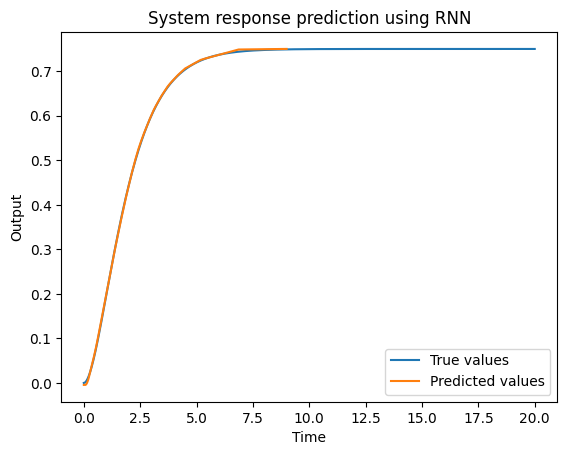

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from scipy import signal


# Определяем функцию передаточной характеристики объекта управления
def H(s):
    return (2*s+1)/(s**2+2*s+1)

# Определяем функцию для генерации функции Хэвисайда
def step(t):
    return np.heaviside(t, 1)

# Определяем область определения для временного ряда
t = np.linspace(0, 20, 2000)

# Вычисляем выходной сигнал на основе передаточной функции и входной функции Хэвисайда
t, y = signal.step((H(1), [1, 2, 1]), T=t)


# Подготавливаем данные для обучения
# Используем первые 1500 значений для обучения модели
# Оставшиеся 500 значений будут использоваться для тестирования модели
devider = 1500

x_train = t[0:devider]
y_train = y[0:devider]
x_test =  t[0:900]

# Определяем архитектуру RNN
model = tf.keras.Sequential([
    tf.keras.layers.SimpleRNN(units=256, activation='relu', input_shape=(1, 1)),
    tf.keras.layers.Dense(units=1)
])

# Компилируем модель с функцией потерь MSE и оптимизатором Adam
model.compile(optimizer='adam', loss='mse')

# Обучаем модель на тренировочных данных
history = model.fit(x_train.reshape(-1, 1, 1), y_train.reshape(-1, 1), epochs=50, verbose=0)

# Оцениваем точность модели на тестовых данных
# score = model.evaluate(x_test.reshape(-1, 1, 1), y_test.reshape(-1, 1), verbose=0)
# print("Test loss:", score)

# Используем обученную модель, чтобы предсказать значения выходной переменной на основе исторических входных данных
y_pred = model.predict(x_test.reshape(-1, 1, 1))
#y_pred = model.predict(t.reshape(-1, 1, 1))

# Строим график исходных значений передаточной функции и предсказанных значений
plt.plot(t, y, label='True values')
plt.plot(x_test, y_pred, label='Predicted values')
plt.legend()
plt.title('System response prediction using RNN')
plt.xlabel('Time')
plt.ylabel('Output')
plt.show()